In [84]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
! cd /content/drive/MyDrive

nltk.download('all')

import re

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

# Dataset

In [85]:
data=pd.read_csv(r"/content/drive/MyDrive/DATA /Malignant_train.csv")
data.head()


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [86]:
test_data=pd.read_csv(r"/content/drive/MyDrive/DATA /malignant_test.csv")
test_data.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [87]:
test_data.shape

(153164, 2)

Train data

In [88]:
data.shape

(159571, 8)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [90]:
data.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [91]:
data.isnull().sum().sum()

0

In [92]:
target_features=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [93]:
for i in target_features:
  print('{}: '.format(i),data[i].unique())
  

malignant:  [0 1]
highly_malignant:  [0 1]
rude:  [0 1]
threat:  [0 1]
abuse:  [0 1]
loathe:  [0 1]


In [94]:
for i in target_features:
  print('{}: \n'.format(i),data[i].value_counts())
  print('-'*60)
  

malignant: 
 0    144277
1     15294
Name: malignant, dtype: int64
------------------------------------------------------------
highly_malignant: 
 0    157976
1      1595
Name: highly_malignant, dtype: int64
------------------------------------------------------------
rude: 
 0    151122
1      8449
Name: rude, dtype: int64
------------------------------------------------------------
threat: 
 0    159093
1       478
Name: threat, dtype: int64
------------------------------------------------------------
abuse: 
 0    151694
1      7877
Name: abuse, dtype: int64
------------------------------------------------------------
loathe: 
 0    158166
1      1405
Name: loathe, dtype: int64
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

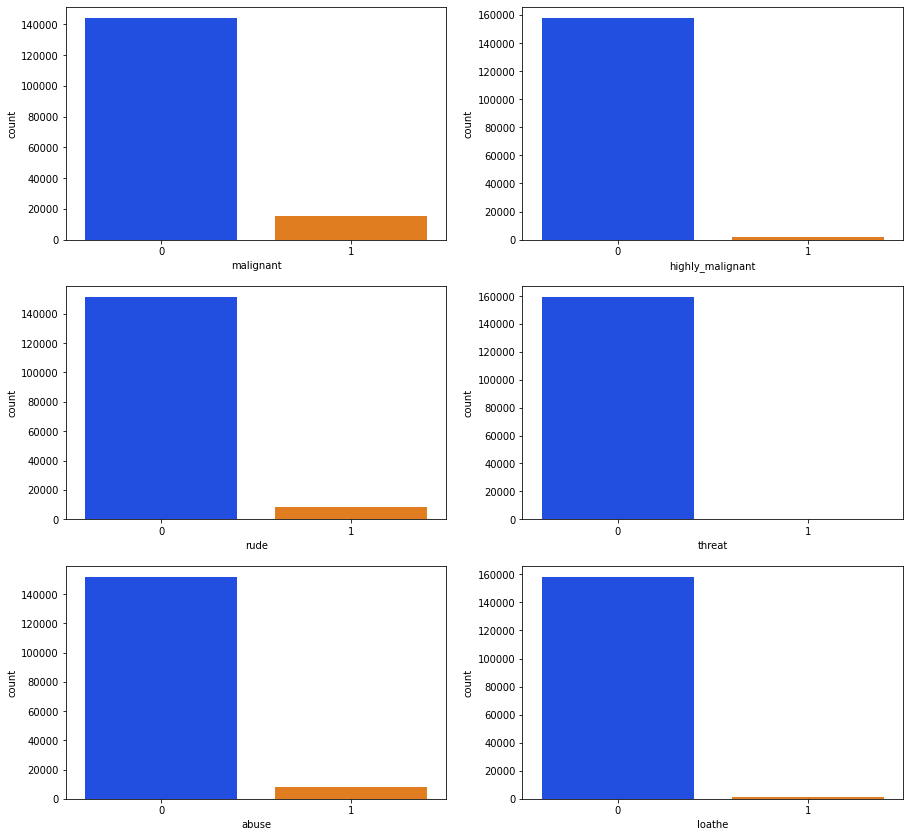

<Figure size 432x288 with 0 Axes>

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,30))
sns.set_palette('bright')
graph=1

for feature in target_features:
  if graph <= len(target_features):
    ax=plt.subplot(6,2,graph)
    sns.countplot(data[feature])
    plt.xlabel(feature,fontsize=10)

  graph+=1
plt.show()
plt.tight_layout()   

# Remove punctuation

In [96]:
data['comment_text'] = data['comment_text'].str.replace('[^\w\s]','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


lowercasing

In [97]:
data['comment_text'] = data['comment_text'].apply(lambda x : x.lower())

## Removing stopwords

In [98]:
stop = stopwords.words('english')
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [99]:
data['comment_text'][0]


'explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired now892053827'

## Lemmatization

In [100]:
lemmatizer=WordNetLemmatizer()

In [101]:
data['comment_text']=data['comment_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))


## NOise removal
  

In [102]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    #remove non-ascii and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    #remove whitespace
    text=text.strip()
    return text

In [103]:
data['comment_text']=data['comment_text'].apply(lambda x: scrub_words(x))

## WordCount

In [104]:
data['comment_WC'] = data['comment_text'].apply(lambda x: len(str(x).split(" ")))
data[['comment_WC','comment_text']].head()

,comment_WC,comment_text
0,27,explanation edits made username hardcore metal...
1,24,daww match background colour im seemingly stuc...
2,22,hey man im really trying edit war guy constant...
3,49,cant make real suggestion improvement wondered...
4,6,sir hero chance remember page thats


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


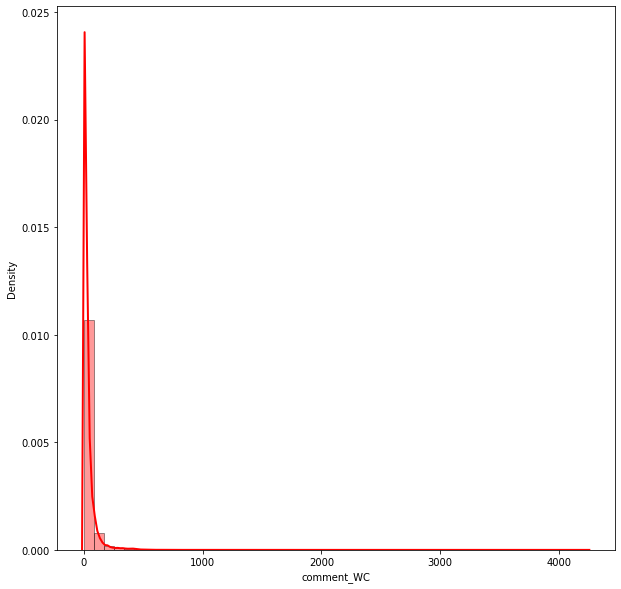

In [105]:
ax=plt.figure(figsize=(10,10))
ax=sns.distplot(data['comment_WC'], hist=True, kde=True, 
              color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

In [106]:
data[data['comment_WC']==0]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_WC


# Character count

In [107]:
data['comment_CC'] = data['comment_text'].str.len() ## this also includes spaces
data[['comment_CC','comment_text']].head()

,comment_CC,comment_text
0,175,explanation edits made username hardcore metal...
1,84,daww match background colour im seemingly stuc...
2,144,hey man im really trying edit war guy constant...
3,370,cant make real suggestion improvement wondered...
4,35,sir hero chance remember page thats


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


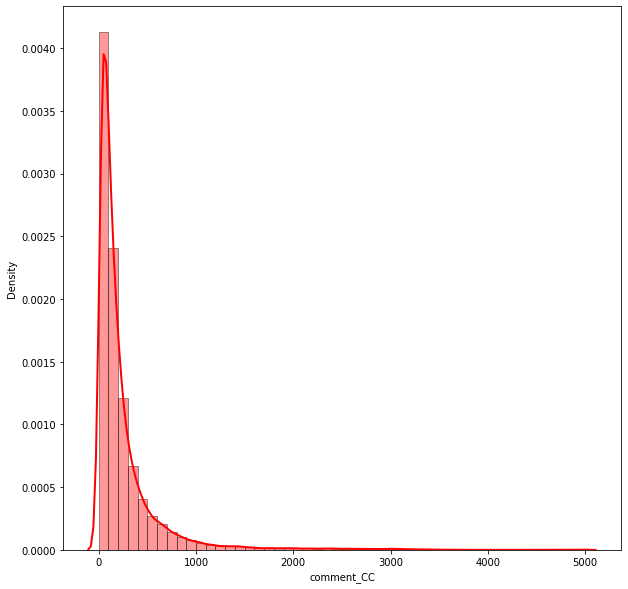

In [108]:
ax=plt.figure(figsize=(10,10))
ax=sns.distplot(data['comment_CC'], hist=True, kde=True, 
              color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

## Average wordlenght

In [109]:
def avg_word(sentence):
  words = sentence.split(" ")
  return (sum(len(word) for word in words)/len(words))

data['comment_avg'] = data["comment_text"].apply(lambda x: avg_word(x))
data[['comment_avg','comment_text']].head()

,comment_avg,comment_text
0,5.518519,explanation edits made username hardcore metal...
1,2.541667,daww match background colour im seemingly stuc...
2,5.590909,hey man im really trying edit war guy constant...
3,6.571429,cant make real suggestion improvement wondered...
4,5.000000,sir hero chance remember page thats


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


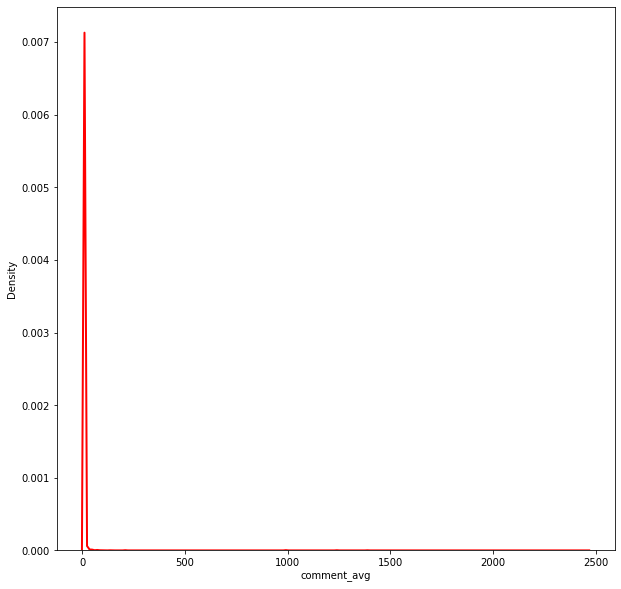

In [110]:
ax=plt.figure(figsize=(10,10))
ax=sns.distplot(data['comment_avg'], hist=False, kde=True, 
              color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

In [111]:
def freq_words(x, terms =30,smallest=False):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  if smallest==False:
    d = words_df.nlargest(columns="count", n = terms) 
  elif smallest==True:
    d = words_df.nsmallest(columns="count", n = terms) 

  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()


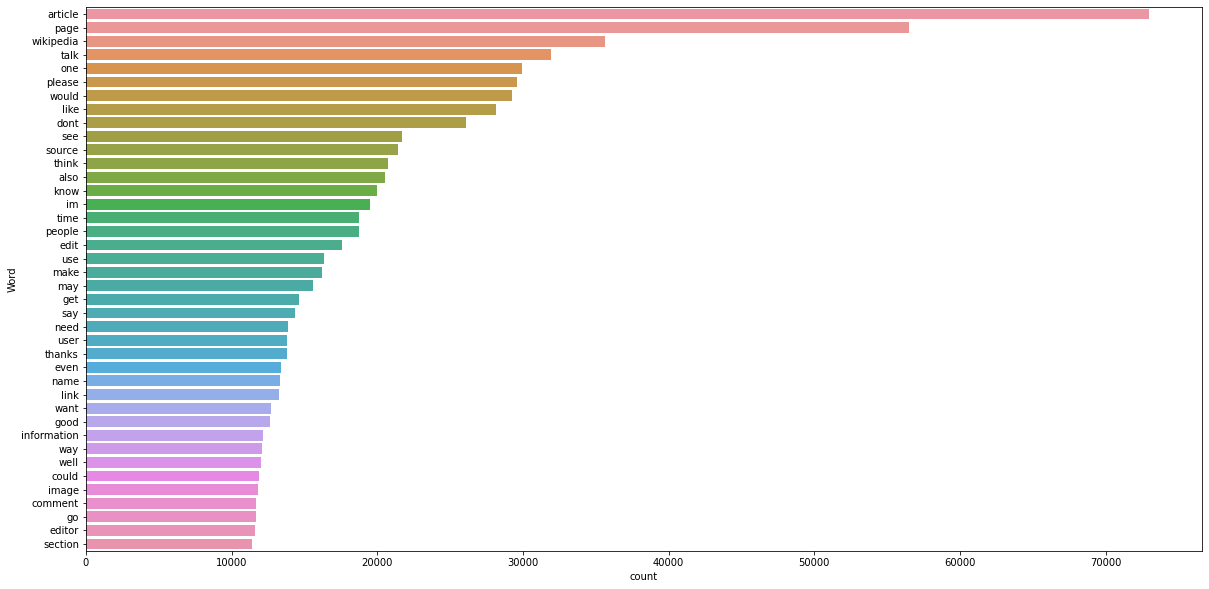

In [112]:
freq_words(data['comment_text'],terms=40,smallest=False)


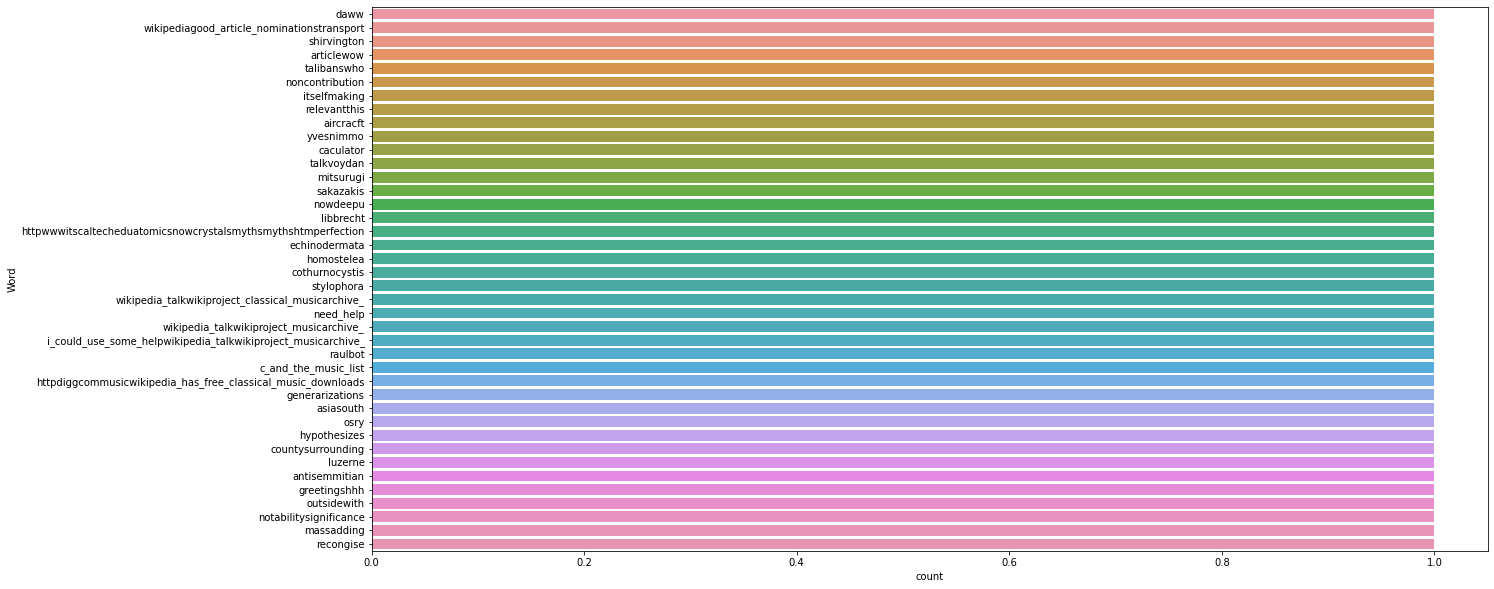

In [113]:
freq_words(data['comment_text'],terms=40,smallest=True)

In [114]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_WC,comment_CC,comment_avg
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,27,175,5.518519
1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0,24,84,2.541667
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,22,144,5.590909
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0,49,370,6.571429
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,6,35,5.000000


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                159571 non-null  object 
 1   comment_text      159571 non-null  object 
 2   malignant         159571 non-null  int64  
 3   highly_malignant  159571 non-null  int64  
 4   rude              159571 non-null  int64  
 5   threat            159571 non-null  int64  
 6   abuse             159571 non-null  int64  
 7   loathe            159571 non-null  int64  
 8   comment_WC        159571 non-null  int64  
 9   comment_CC        159571 non-null  int64  
 10  comment_avg       159571 non-null  float64
dtypes: float64(1), int64(8), object(2)
memory usage: 13.4+ MB


In [116]:
data.describe()


,malignant,highly_malignant,rude,threat,abuse,loathe,comment_WC,comment_CC,comment_avg
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,37.401596,250.318216,5.871323
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,60.714103,390.239032,9.541842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,59.000000,5.125000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,128.000000,5.833333
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,273.000000,6.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4240.000000,5000.000000,2466.500000


In [117]:
data.isna().sum().sum()

0

In [118]:

data.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
comment_WC          0
comment_CC          0
comment_avg         0
dtype: int64

In [119]:
data['Malignant_label']=data[target_features].sum(axis=1)

In [120]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_WC,comment_CC,comment_avg,Malignant_label
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,27,175,5.518519,0
1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0,24,84,2.541667,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,22,144,5.590909,0
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0,49,370,6.571429,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,6,35,5.000000,0


In [121]:
data['Malignant_label'].unique()

array([0, 4, 1, 3, 2, 5, 6])

In [122]:
data['Malignant_label']=(data['Malignant_label']>0).astype('int64')

In [123]:
data['Malignant_label'].unique()

array([0, 1])

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                159571 non-null  object 
 1   comment_text      159571 non-null  object 
 2   malignant         159571 non-null  int64  
 3   highly_malignant  159571 non-null  int64  
 4   rude              159571 non-null  int64  
 5   threat            159571 non-null  int64  
 6   abuse             159571 non-null  int64  
 7   loathe            159571 non-null  int64  
 8   comment_WC        159571 non-null  int64  
 9   comment_CC        159571 non-null  int64  
 10  comment_avg       159571 non-null  float64
 11  Malignant_label   159571 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 14.6+ MB


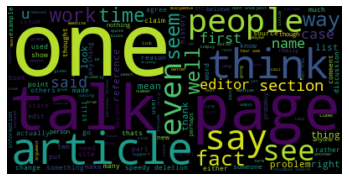

In [125]:
common_words=''
for i in data['comment_text']:
    
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Using Count vectorizer

In [126]:
from sklearn.feature_extraction.text import CountVectorizer



In [127]:
vect = CountVectorizer(stop_words='english',max_features=5000)
X=vect.fit_transform(data['comment_text'])
X.shape

(159571, 5000)

In [128]:
Y=data['Malignant_label']

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 35)

In [130]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,roc_auc_score,classification_report,precision_score

In [131]:
def Cscore(clf,x_trn,y_trn,x_tst,y_tst,train_score=True):
    if train_score:
        ypred_train=clf.predict(x_trn)
        print('******** Train Results***************')
        print("Train Accuracy Score is ",accuracy_score(y_trn,ypred_train))
        print('******************************************************')
        print("Train roc_auc_Score is ",roc_auc_score(y_trn,ypred_train))
        print('-'*50)
        
    elif train_score==False:
        ypred_test=clf.predict(x_tst)
        print('\n******** Test Results***************')
        print("Test Accuracy Score is ", accuracy_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Precision Score is ", precision_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test f1 Score is ", f1_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Recall Score is ", recall_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test roc_auc_Score is ",roc_auc_score(y_tst,ypred_test))
        print('-'*50)
        print('\n Classification Report \n ',classification_report(y_tst,ypred_test,digits=3))
        print('-'*50)
        print('\n Confusion Matrix  \n\n',sns.heatmap(confusion_matrix(y_tst,ypred_test),annot=True,annot_kws={'color':'black'},fmt="d",cmap='Set2'))

******** Train Results***************
Train Accuracy Score is  0.9480478786739363
******************************************************
Train roc_auc_Score is  0.8402933274994474
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.945542848190506
******************************************************
Test Precision Score is  0.7531155271135063
******************************************************
Test f1 Score is  0.7201288244766506
******************************************************
Test Recall Score is  0.6899105214439988
******************************************************
Test roc_auc_Score is  0.83217364671628
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.965     0.974     0.970     28674
           1      0.753     0.690     0.720      3241

    accuracy                          0.946     31915
   macro av

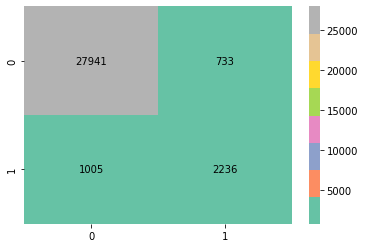

In [132]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
Cscore(MNB,x_train,y_train,x_test,y_test,train_score=True)
Cscore(MNB,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.7119681017735163
******************************************************
Train roc_auc_Score is  0.7891374807955027
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7145229515901613
******************************************************
Test Precision Score is  0.24562315825966372
******************************************************
Test f1 Score is  0.3835171527166926
******************************************************
Test Recall Score is  0.8744214748534404
******************************************************
Test roc_auc_Score is  0.7854356101337021
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.980     0.696     0.814     28674
           1      0.246     0.874     0.384      3241

    accuracy                          0.715     31915
   macr

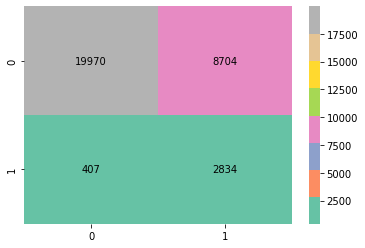

In [133]:
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
Cscore(BNB,x_train,y_train,x_test,y_test,train_score=True)
Cscore(BNB,x_train,y_train,x_test,y_test,train_score=False)

# TF-IDF vectorizer

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [135]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) ,max_features=5000)  

word_vectorizer.fit(data['comment_text'])
X = word_vectorizer.transform(data['comment_text'])

In [136]:
X.shape

(159571, 5000)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 35)

In [138]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(127656, 5000)
(31915, 5000)
(127656,)
(31915,)


******** Train Results***************
Train Accuracy Score is  0.9493874161809864
******************************************************
Train roc_auc_Score is  0.7719903180576823
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9471408428638571
******************************************************
Test Precision Score is  0.9042663891779397
******************************************************
Test f1 Score is  0.6732519852798761
******************************************************
Test Recall Score is  0.5362542425177415
******************************************************
Test roc_auc_Score is  0.7649186397076396
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.950     0.994     0.971     28674
           1      0.904     0.536     0.673      3241

    accuracy                          0.947     31915
   macro

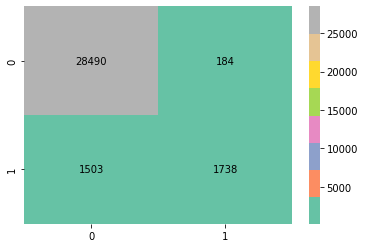

In [139]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
Cscore(MNB,x_train,y_train,x_test,y_test,train_score=True)
Cscore(MNB,x_train,y_train,x_test,y_test,train_score=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


******** Train Results***************
Train Accuracy Score is  0.9600097136053143
******************************************************
Train roc_auc_Score is  0.8311406130274128
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9566661444461851
******************************************************
Test Precision Score is  0.8929780033840947
******************************************************
Test f1 Score is  0.7532560214094558
******************************************************
Test Recall Score is  0.6513421783400185
******************************************************
Test roc_auc_Score is  0.8212594270370664
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.962     0.991     0.976     28674
           1      0.893     0.651     0.753      3241

    accuracy                          0.957     31915
   macro

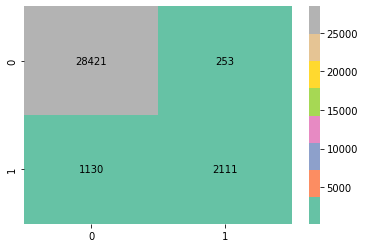

In [140]:
from sklearn.ensemble import RandomForestClassifier
log=LogisticRegression(C=2)
log.fit(x_train,y_train)
Cscore(log,x_train,y_train,x_test,y_test,train_score=True)
Cscore(log,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.6423826533809613
******************************************************
Train roc_auc_Score is  0.7584302085291824
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.6443051856493812
******************************************************
Test Precision Score is  0.2081744261351371
******************************************************
Test f1 Score is  0.337612323491656
******************************************************
Test Recall Score is  0.892625732798519
******************************************************
Test roc_auc_Score is  0.7544317197158528
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.981     0.616     0.757     28674
           1      0.208     0.893     0.338      3241

    accuracy                          0.644     31915
   macro a

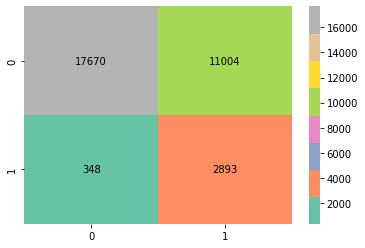

In [141]:
BNB=BernoulliNB( )
BNB.fit(x_train,y_train)
Cscore(BNB,x_train,y_train,x_test,y_test,train_score=True)
Cscore(BNB,x_train,y_train,x_test,y_test,train_score=False)

## Using word2Vec algorithm

In [142]:
words=[]
for sent in data['comment_text']:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(word_tokenize(sent))
len(words)

159473

In [144]:
words[0]

['explanation',
 'edits',
 'made',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'reverted',
 'werent',
 'vandalism',
 'closure',
 'gas',
 'voted',
 'new',
 'york',
 'doll',
 'fac',
 'please',
 'dont',
 'remove',
 'template',
 'talk',
 'page',
 'since',
 'im',
 'retired',
 'now']

In [143]:
from gensim.models import Word2Vec

In [ ]:
w2v =Word2Vec(words, window=5,size=300)

In [145]:
w2v.wv.__getitem__('cash')

array([-0.3030419 ,  0.06780331, -0.11367084, -0.1399124 , -0.02915117,
        0.21974261, -0.11384014, -0.18179339, -0.1543294 , -0.27937052,
       -0.25885704, -0.35250974,  0.12968437,  0.1534548 ,  0.13848323,
        0.1161255 ,  0.13777973, -0.11191991, -0.28950804, -0.2027305 ,
        0.2884228 ,  0.4639376 , -0.09553663,  0.01073374, -0.04757547,
       -0.3198785 , -0.00847801,  0.09826514, -0.46738535, -0.16427173,
        0.38659602, -0.11254287, -0.04630222,  0.06517649,  0.26166114,
       -0.18127489,  0.11214495, -0.15188038,  0.3434033 , -0.27043596,
       -0.40909484,  0.5634776 , -0.4191842 , -0.36726072, -0.32134607,
        0.00181308,  0.24983723,  0.00062869,  0.13082124, -0.1622955 ,
        0.18848772,  0.40793878, -0.10684486, -0.05469528, -0.00199378,
        0.26932466, -0.25613922,  0.56417793, -0.06996648, -0.44320664,
       -0.53430504,  0.37374315,  0.30812627, -0.03372613,  0.27697822,
       -0.14545316,  0.12656713, -0.220347  , -0.2230815 ,  0.03

In [146]:
w2v.wv.most_similar('money', topn=5)


[('profit', 0.6954429149627686),
 ('usd', 0.6684502363204956),
 ('fund', 0.6503811478614807),
 ('donation', 0.6469357013702393),
 ('dollar', 0.6459822654724121)]

In [147]:
w2v.wv.most_similar('money', topn=5)

[('profit', 0.6954429149627686),
 ('usd', 0.6684502363204956),
 ('fund', 0.6503811478614807),
 ('donation', 0.6469357013702393),
 ('dollar', 0.6459822654724121)]

In [148]:
def sent_vec_w2v(sent):
    wv_res = np.zeros(w2v.vector_size)
    ctr = 1
    for w in sent:
        if w in w2v:
            ctr += 1
            wv_res += w2v.wv.__getitem__(w)
    wv_res = wv_res/ctr
    return wv_res

In [149]:
X=[]
for sent in data['comment_text']:
  tokens=[word for word in sent.split()]
  X.append(sent_vec_w2v(tokens))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """


In [150]:
len(X)

159571

In [151]:
type(X)

list

In [152]:
X[1].shape

(300,)

In [153]:
X=np.array(X)

In [154]:
Y=data['Malignant_label']

In [155]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=35)

******** Train Results***************
Train Accuracy Score is  0.8811985783220978
******************************************************
Train roc_auc_Score is  0.8310785889918378
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8812040441176471
******************************************************
Test Precision Score is  0.4519405150525934
******************************************************
Test f1 Score is  0.5679556332143129
******************************************************
Test Recall Score is  0.7641046606704824
******************************************************
Test roc_auc_Score is  0.8293185006470142
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.971     0.895     0.931     42980
           1      0.452     0.764     0.568      4892

    accuracy                          0.881     47872
   macro

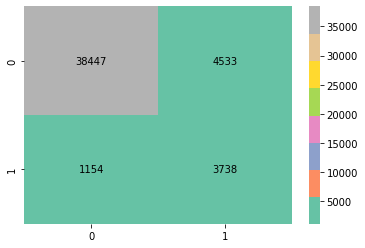

In [156]:
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
Cscore(BNB,x_train,y_train,x_test,y_test,train_score=True)
Cscore(BNB,x_train,y_train,x_test,y_test,train_score=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


******** Train Results***************
Train Accuracy Score is  0.9486029418347524
******************************************************
Train roc_auc_Score is  0.7939125752186774
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9476311831550802
******************************************************
Test Precision Score is  0.8463549230322394
******************************************************
Test f1 Score is  0.6992201559688062
******************************************************
Test Recall Score is  0.5956663941128373
******************************************************
Test roc_auc_Score is  0.7916791719284522
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.955     0.988     0.971     42980
           1      0.846     0.596     0.699      4892

    accuracy                          0.948     47872
   macro

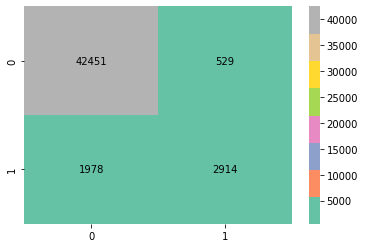

In [157]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
Cscore(logreg,x_train,y_train,x_test,y_test,train_score=True)
Cscore(logreg,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9996508473665834
******************************************************
Train roc_auc_Score is  0.9985924585812097
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9405497994652406
******************************************************
Test Precision Score is  0.8928571428571429
******************************************************
Test f1 Score is  0.6203308431163288
******************************************************
Test Recall Score is  0.4752657399836468
******************************************************
Test roc_auc_Score is  0.7343871743194177
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.943     0.994     0.968     42980
           1      0.893     0.475     0.620      4892

    accuracy                          0.941     47872
   macro

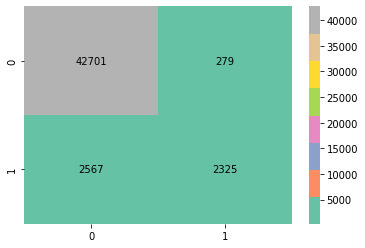

In [158]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
Cscore(rf,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf,x_train,y_train,x_test,y_test,train_score=False)

In [159]:
from xgboost import XGBClassifier

******** Train Results***************
Train Accuracy Score is  0.9996777052614616
******************************************************
Train roc_auc_Score is  0.998607403881411
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9449156082887701
******************************************************
Test Precision Score is  0.8571428571428571
******************************************************
Test f1 Score is  0.6723816623183004
******************************************************
Test Recall Score is  0.553147996729354
******************************************************
Test roc_auc_Score is  0.7713273720268454
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.951     0.990     0.970     42980
           1      0.857     0.553     0.672      4892

    accuracy                          0.945     47872
   macro a

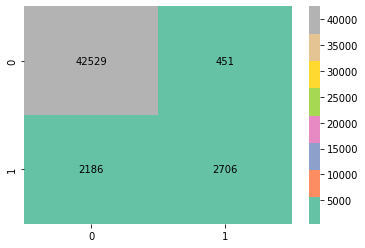

In [160]:
xgc=XGBClassifier(max_depth=150,learning_rate=0.1)

xgc.fit(x_train,y_train)
Cscore(xgc,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc,x_train,y_train,x_test,y_test,train_score=False)

# Finalizing model

In [161]:
vect = CountVectorizer(stop_words='english',max_features=5000)
X=vect.fit_transform(data['comment_text'])
X.shape

(159571, 5000)

In [162]:
Y=data['Malignant_label']

In [163]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 35)


******** Train Results***************
Train Accuracy Score is  0.9978222723569593
******************************************************
Train roc_auc_Score is  0.9905921658546424
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9517781607394642
******************************************************
Test Precision Score is  0.8208898944193062
******************************************************
Test f1 Score is  0.738842694722552
******************************************************
Test Recall Score is  0.67170626349892
******************************************************
Test roc_auc_Score is  0.8275703668753581
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.964     0.983     0.973     28674
           1      0.821     0.672     0.739      3241

    accuracy                          0.952     31915
   macro av

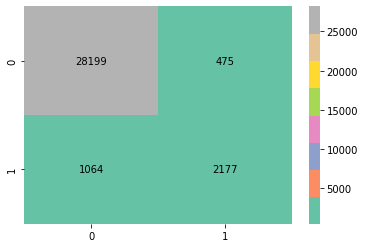

In [164]:
rf= RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)
Cscore(rf,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9804239518706523
******************************************************
Train roc_auc_Score is  0.9113130302111211
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9558828137239542
******************************************************
Test Precision Score is  0.8748466257668711
******************************************************
Test f1 Score is  0.7523742525501231
******************************************************
Test Recall Score is  0.6599814871953101
******************************************************
Test roc_auc_Score is  0.8246548992787599
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.963     0.989     0.976     28674
           1      0.875     0.660     0.752      3241

    accuracy                          0.956     31915
   macro

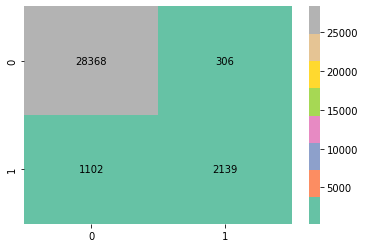

In [165]:
xgc=XGBClassifier(max_depth=80,learning_rate=0.1)

xgc.fit(x_train,y_train)
Cscore(xgc,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9480478786739363
******************************************************
Train roc_auc_Score is  0.8402933274994474
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.945542848190506
******************************************************
Test Precision Score is  0.7531155271135063
******************************************************
Test f1 Score is  0.7201288244766506
******************************************************
Test Recall Score is  0.6899105214439988
******************************************************
Test roc_auc_Score is  0.83217364671628
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.965     0.974     0.970     28674
           1      0.753     0.690     0.720      3241

    accuracy                          0.946     31915
   macro av

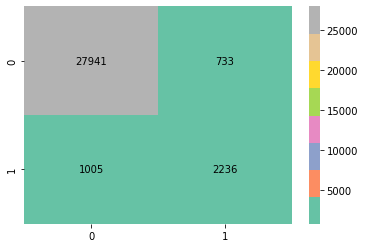

In [166]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
Cscore(MNB,x_train,y_train,x_test,y_test,train_score=True)
Cscore(MNB,x_train,y_train,x_test,y_test,train_score=False)

In [169]:
from sklearn.model_selection import cross_val_score

In [171]:
scr=cross_val_score(xgc,X,Y,cv=5).mean()

In [173]:
print("Validation Accuracy of XGBclassifier is {}".format(scr))

Validation Accuracy of XGBclassifier is 0.9556372958734244


In [174]:
rf_val=cross_val_score(rf,X,Y,cv=5).mean()
print("Validation Accuracy of RandomForest classifier is {}".format(rf_val))


Validation Accuracy of RandomForest classifier is 0.9516641425028259


In [175]:
MNB_val=cross_val_score(MNB,X,Y,cv=5).mean()
print("Validation Accuracy of RandomForest classifier is {}".format(MNB_val))

Validation Accuracy of RandomForest classifier is 0.9465316427763314


# Auc Curve

In [177]:
def AUCplot(clf_list,x,y,Test=True):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x,y)
    for i in clf_list[1:]:
        plot_roc_curve(i,x,y,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    if Test==False:
        plt.title("AUC ROC CURVE for Train data")
    elif Test==True:
        plt.title("AUC ROC CURVE for Test data")
    plt.show()

In [178]:
classifiers=[MNB,rf,xgc]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

<Figure size 1440x1440 with 0 Axes>

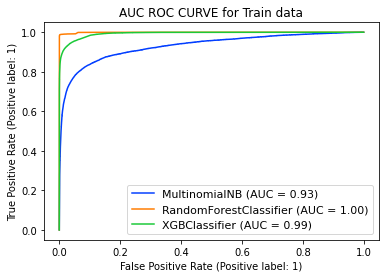

In [180]:
from sklearn.metrics import plot_roc_curve
AUCplot(classifiers,x_train,y_train,Test=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

<Figure size 1440x1440 with 0 Axes>

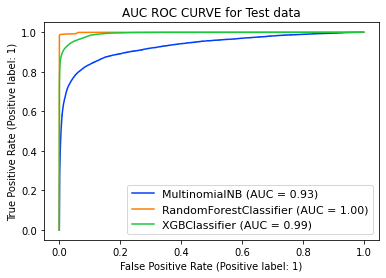

In [181]:
AUCplot(classifiers,x_train,y_train,Test=True)


### Saving Model

In [182]:
import joblib
joblib.dump(xgc,"MalignantXGC.pkl")


['MalignantXGC.pkl']

# Prediction with TEst data

In [202]:
import warnings
warnings.filterwarnings("ignore")

In [203]:
test_data.head()

,id,comment_text,comment_WC,comment_CC,comment_avg
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...,45,245,4.466667
1,0000247867823ef7,rfc title fine imo,4,18,3.750000
2,00013b17ad220c46,source zawe ashton lapland,4,26,5.750000
3,00017563c3f7919a,look back source information updated correct f...,16,115,6.250000
4,00017695ad8997eb,dont anonymously edit article,4,29,6.500000


In [204]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            153164 non-null  object 
 1   comment_text  153164 non-null  object 
 2   comment_WC    153164 non-null  int64  
 3   comment_CC    153164 non-null  int64  
 4   comment_avg   153164 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.8+ MB


In [205]:
test_data.describe()

,comment_WC,comment_CC,comment_avg
count,153164.000000,153164.000000,153164.000000
mean,34.948278,231.757273,5.883601
std,65.294818,404.542480,7.808919
min,1.000000,0.000000,0.000000
25%,7.000000,48.000000,5.000000
50%,17.000000,111.000000,5.750000
75%,36.000000,245.000000,6.411765
max,2953.000000,5117.000000,1238.500000


In [206]:
test_data.isna().sum().sum()

0

# Test data preprocessing

In [207]:
test_data['comment_text'] = test_data['comment_text'].str.replace('[^\w\s]','')
test_data['comment_text'] = test_data['comment_text'].apply(lambda x : x.lower())
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_data['comment_text']=test_data['comment_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))
test_data['comment_text']=test_data['comment_text'].apply(lambda x: scrub_words(x))


In [208]:
test_data['comment_WC'] = test_data['comment_text'].apply(lambda x: len(str(x).split(" ")))
test_data[['comment_WC','comment_text']].head()

,comment_WC,comment_text
0,44,yo bitch ja rule succesful youll ever whats ha...
1,4,rfc title fine imo
2,4,source zawe ashton lapland
3,16,look back source information updated correct f...
4,4,dont anonymously edit article


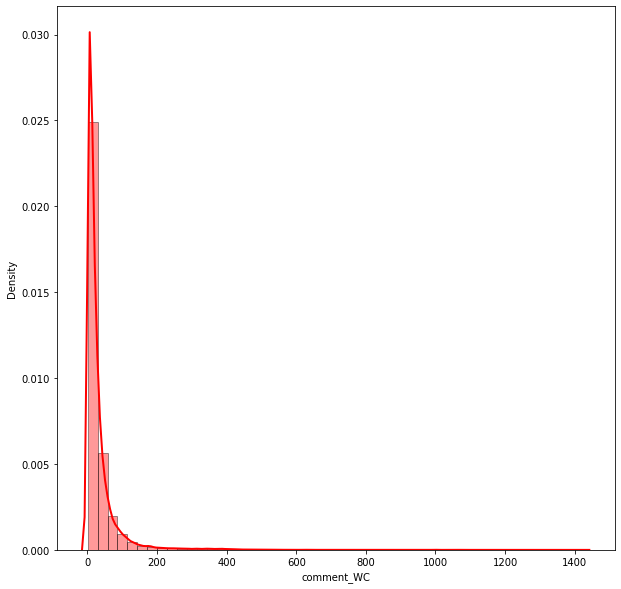

In [209]:
ax=plt.figure(figsize=(10,10))
ax=sns.distplot(test_data['comment_WC'], hist=True, kde=True, 
              color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

In [210]:
test_data['comment_CC'] = test_data['comment_text'].str.len() ## this also includes spaces
test_data[['comment_CC','comment_text']].head()

,comment_CC,comment_text
0,242,yo bitch ja rule succesful youll ever whats ha...
1,18,rfc title fine imo
2,26,source zawe ashton lapland
3,115,look back source information updated correct f...
4,29,dont anonymously edit article


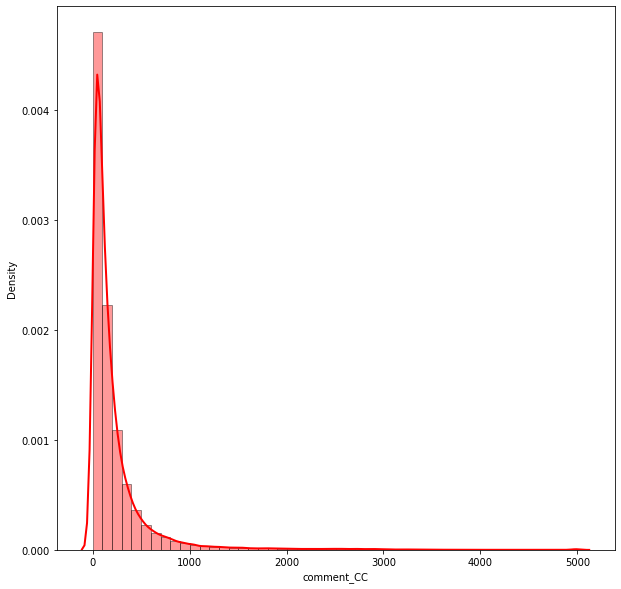

In [211]:
ax=plt.figure(figsize=(10,10))
ax=sns.distplot(test_data['comment_CC'], hist=True, kde=True, 
              color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

In [212]:

test_data['comment_avg'] = test_data["comment_text"].apply(lambda x: avg_word(x))
test_data[['comment_avg','comment_text']].head()

,comment_avg,comment_text
0,4.522727,yo bitch ja rule succesful youll ever whats ha...
1,3.750000,rfc title fine imo
2,5.750000,source zawe ashton lapland
3,6.250000,look back source information updated correct f...
4,6.500000,dont anonymously edit article


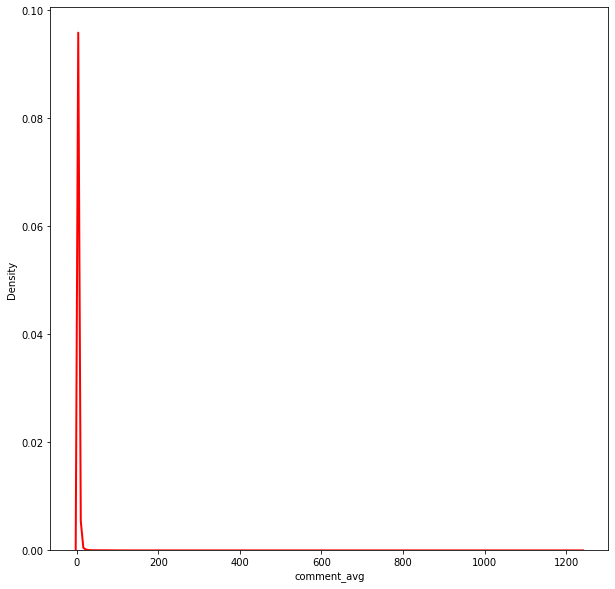

In [213]:
ax=plt.figure(figsize=(10,10))
ax=sns.distplot(test_data['comment_avg'], hist=False, kde=True, 
              color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

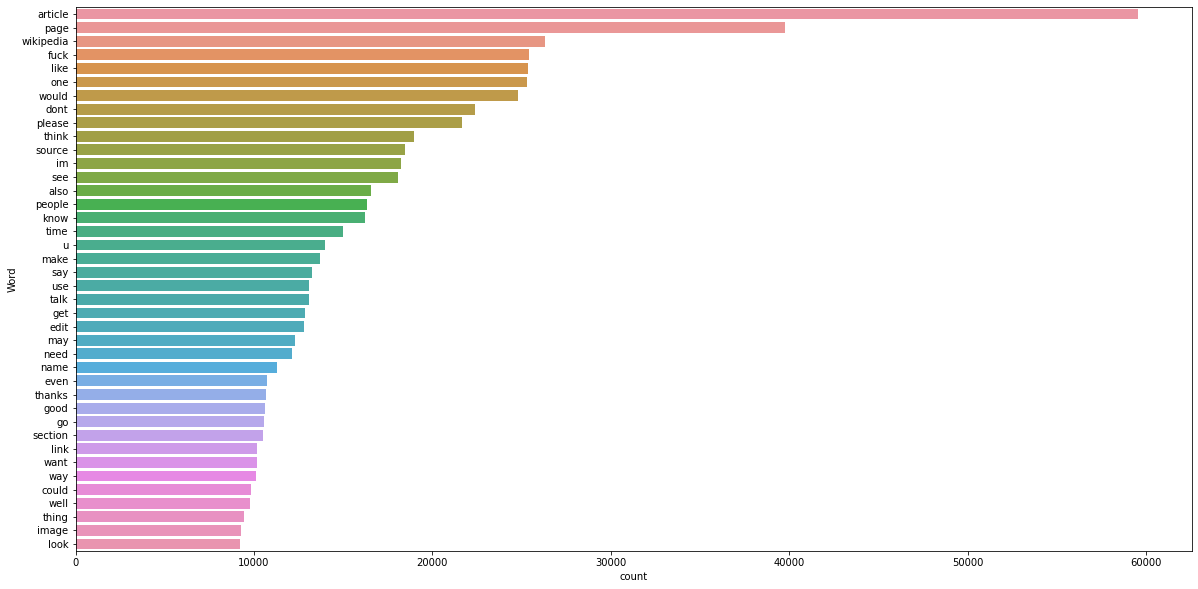

In [214]:
freq_words(test_data['comment_text'],terms=40,smallest=False)


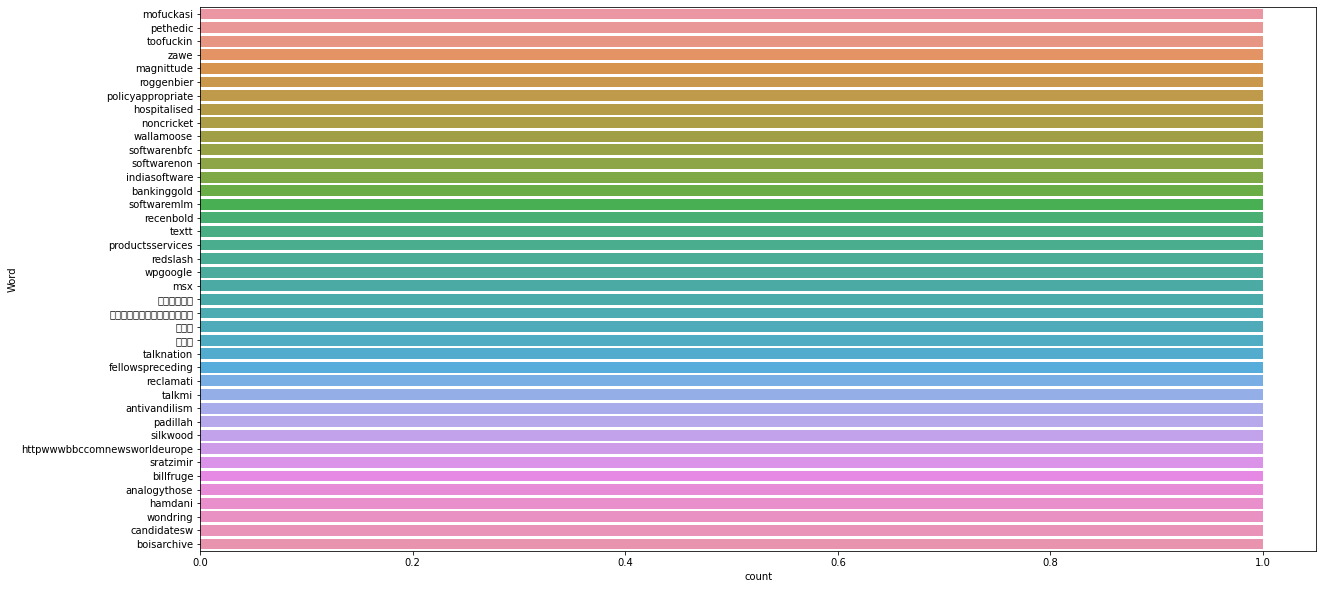

In [215]:
freq_words(test_data['comment_text'],terms=40,smallest=True)


In [216]:
import wordcloud 

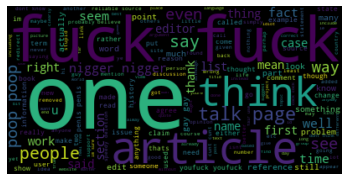

In [217]:
common_words=''
for i in test_data['comment_text']:
    
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [217]:
test_data.head()

In [218]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            153164 non-null  object 
 1   comment_text  153164 non-null  object 
 2   comment_WC    153164 non-null  int64  
 3   comment_CC    153164 non-null  int64  
 4   comment_avg   153164 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.8+ MB


# Transforming to countvectorizer

In [219]:
test_X=vect.transform(test_data['comment_text'])
test_X.shape

(153164, 5000)

In [221]:
Prediction=xgc.predict(test_X)
Prediction.shape

(153164,)

In [222]:
test_data['Malignnat_comment']=Prediction

In [223]:
test_data.head()

,id,comment_text,comment_WC,comment_CC,comment_avg,Malignnat_comment
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...,44,242,4.522727,1
1,0000247867823ef7,rfc title fine imo,4,18,3.750000,0
2,00013b17ad220c46,source zawe ashton lapland,4,26,5.750000,0
3,00017563c3f7919a,look back source information updated correct f...,16,115,6.250000,0
4,00017695ad8997eb,dont anonymously edit article,4,29,6.500000,0


In [224]:
test_data.to_csv('/content/drive/MyDrive/DATA /Updated_malignant_test_With_prediction.csv')

In [225]:
Test=pd.read_csv("/content/drive/MyDrive/DATA /malignant_test.csv")
Test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [226]:
Test['Malignant_Comment']=Prediction

In [227]:
Test.to_csv("/content/drive/MyDrive/DATA /Prediction_malignant_test.csv")

## The End